In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [6]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv(r'C:\Users\tusha\OneDrive\Desktop\gold price predictor\models\gld_price_data.csv')

In [7]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [10]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [29]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']
Z = gold_data.drop(['Date'],axis=1)

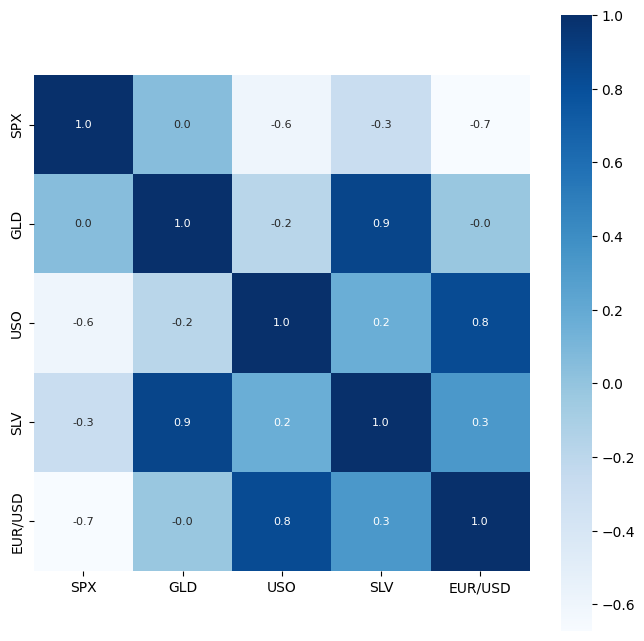

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [30]:
# Calculating the correlation matrix including 'GLD'
correlation_matrix = Z.corr()

# Constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

# Correlation values of GLD
print(correlation_matrix['GLD'])

C:\Users\tusha\AppData\Local\Temp\ipykernel_27332\563101706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

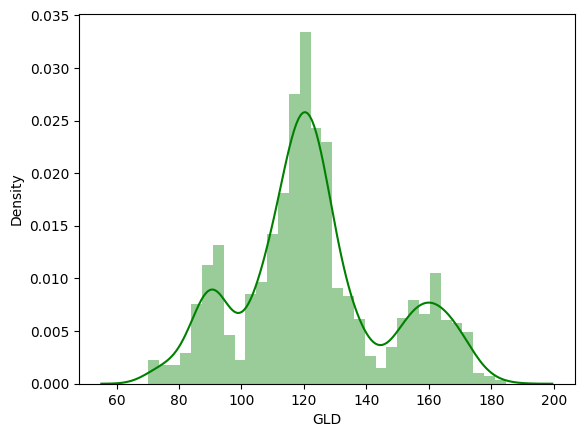

In [31]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [32]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [34]:
regressor = RandomForestRegressor(n_estimators=100)

In [35]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [37]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [38]:
print(test_data_prediction)

[168.42299944  82.01249992 116.01430022 127.52800068 120.73590131
 154.62429837 150.75919838 126.08950073 117.37319879 125.96280067
 116.60160116 171.84170104 141.62469881 167.77819877 115.20719996
 117.97250069 137.30030399 170.18410084 159.86280327 161.56339941
 154.91450003 125.2145004  176.23169933 157.005004   125.10260028
  93.81759972  77.61960008 120.54670013 119.09949949 167.5551002
  88.2307001  125.37939995  91.09430047 117.59850051 121.03729873
 136.69350137 115.54150155 115.23460095 146.25879927 107.2355011
 104.22460232  87.20829792 126.47140068 117.81150029 154.34999864
 119.46020017 108.56189985 108.14009796  93.12700007 127.09189778
  74.15590062 113.64789949 121.15200014 111.29519895 118.76849864
 120.6309994  159.723301   165.60730223 146.82059735  85.88669885
  94.27920014  86.8009989   90.71570008 119.03890071 126.39830068
 127.56659959 169.41339901 122.29239929 117.48319895  98.51560033
 168.11440129 143.20449792 132.35680257 121.20990252 120.53129974
 119.7891002

In [39]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9899834943597481


In [40]:
Y_test = list(Y_test)

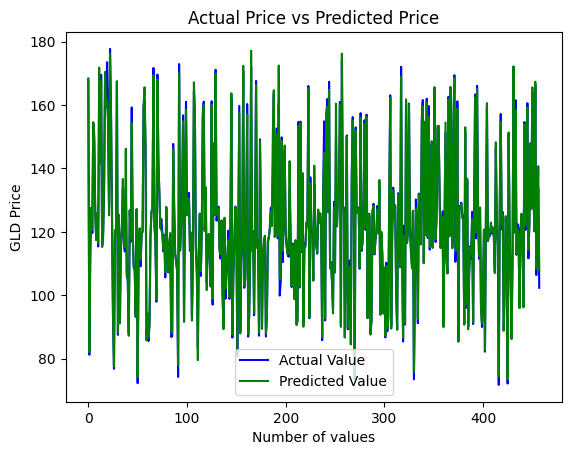

In [41]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [42]:
import pickle
filename = 'model.pkl'
pickle.dump(regressor, open(filename, 'wb'))
